## Advanced (optional)
Plot temperature data from NCEP reanalysis data. xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here:  <br>https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis/surface/catalog.html

In [1]:
import xarray as xr
file = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2022.nc'
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1012)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-09-10T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

Plot temperature for the last time step.

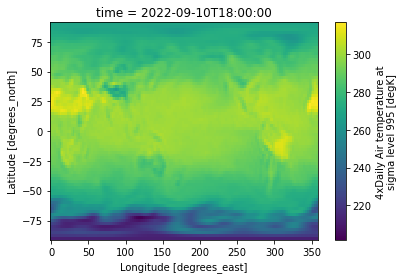

In [2]:
ds.air.isel(time=-1).plot()

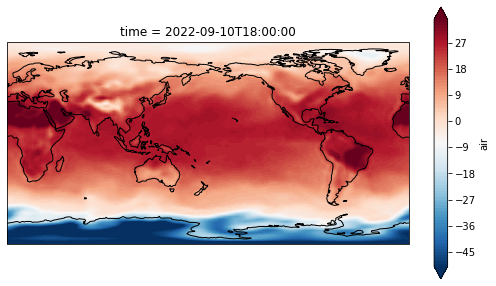

In [3]:
# Make a prettier plot
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
lev1=np.arange(-50,36,1)
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
(ds.air.isel(time=-1)-273).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1)
ax.coastlines()

List temperature for the first time step.

In [5]:
ds.time.isel(time=0)

<xarray.DataArray 'time' ()>
array('2022-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-01-01
Attributes:
    long_name:      Time
    delta_t:        0000-00-00 06:00:00
    standard_name:  time
    axis:           T
    actual_range:   [1946016. 1952082.]
    _ChunkSizes:    512

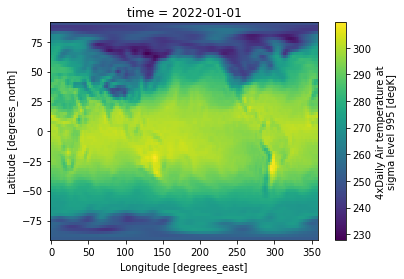

In [6]:
# Plot global T for January 1st 00 UTC
ds.air.sel(time='2022-01-01T00:00:00.000000000').plot()

## Optional Exercise

Plot temperature for January 6th 12 UTC.

In [9]:
# Check dimension variables.
print(ds.lat)
print(ds.lon)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y
<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.

/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


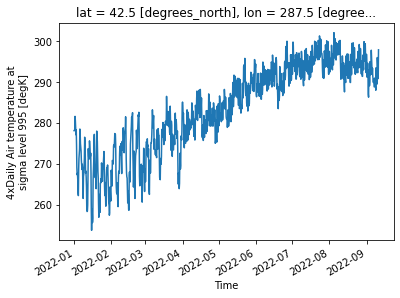

In [8]:
#Plot temperature of a point
lat_pvd=41.8
lon_pvd=-71.4+360
ds.air.sel(lat=lat_pvd,lon=lon_pvd , method='nearest').plot()